# Crimes in India - Capstone Project


# References:

- research on census, crime rate calculation, crime growth patter in India done from: https://www.google.com/
- census data (Population, Literacy rate etc) collected from: https://censusindia.gov.in/nada/index.php/catalog/32982
- growth rates for population etc.over the years  collected from: https://m.rbi.org.in/Scripts/AnnualPublications.aspx?head=Handbook%20of%20Statistics%20on%20Indian%20States
- Police strength and poice station data collected from :https://bprd.nic.in/content/62_1_DataonPoliceOrganizations.aspx
- additional feature data (unemployment, poverty etc) collected from: https://www.kaggle.com/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1

Data Collection/preparation part.

#### Note: 

- You can collect data from anywhere (wiki, google, etc) but mention the link from where data is being collected.
- You can collect the data manually. It's NOT a web scraping task.
- Data should be collected for the years mentioned in the files. (If you don't find proper data, make your best judgment and fill it, It's absolutely OK. Do not worry about data accuracy)

In [2]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Data Trained\\Capstone Project\\WIP _final version - Copy.csv")

In [3]:
df.head()

,Area_Name,Year,Type of Crime,Population,Area,Literacy Rate,Unemployment,Poverty,Total Crimes,Total Crime Rate
0,Andaman & Nicobar Islands,2001,Property Stolen,356,8249,81.3,34,20.99,290,239.88764
1,Andaman & Nicobar Islands,2001,Dacoity,356,8249,81.3,34,20.99,0,239.88764
2,Andaman & Nicobar Islands,2001,Robbery,356,8249,81.3,34,20.99,12,239.88764
3,Andaman & Nicobar Islands,2001,Burglary,356,8249,81.3,34,20.99,192,239.88764
4,Andaman & Nicobar Islands,2001,Theft,356,8249,81.3,34,20.99,195,239.88764


In [4]:
df.tail()

,Area_Name,Year,Type of Crime,Population,Area,Literacy Rate,Unemployment,Poverty,Total Crimes,Total Crime Rate
3706,West Bengal,2010,Human Rights violation,4120039,88752,56.27,28,27.02,2,2.573784
3707,West Bengal,2010,Dacoity_areawise,4120039,88752,56.27,28,27.02,288,2.573784
3708,West Bengal,2010,Robbery_areawise,4120039,88752,56.27,28,27.02,798,2.573784
3709,West Bengal,2010,Burglary_areawise,4120039,88752,56.27,28,27.02,388,2.573784
3710,West Bengal,2010,Theft_areawise,4120039,88752,56.27,28,27.02,19389,2.573784


# Description of the dataset collected

- Area_Name : Names of the states in India
- Year       : 2001-2010
- Type of Crime : Tells the name of the crime committed. This information has been taken from the state crime files provided as attachment with the project
- Population   : This dataset has been taken from the official census website of India. The census is conducted every 10 years. From the census website, I received the census information of 2001, when the census was conducted. After that, population change rate for every year was applied to get figures for the year 2002-2010.
- Area : This information was also received from the official census website of India
- Literacy Rate: This information was also received from the official census website of India
- Unmmployment:This information was also received from the official census website of RBI (Annual Statistics)
- Poverty : This information was also received from the official census website of RBI (Annual Statistics)
- Total Crimes: This tells the count of crimes that happened. This information has been taken from the state crime files provided as attachment with the project.
- Total Crime Rate : This field was calculated using the formula ; Total crime rate = (Total crimes)/Population * 100

In [5]:
df.shape

(3711, 10)

- There are 3711 rows and 10 columns in the dataset
- Out of the 10 columns,1 is target variable and remaining are features

In [6]:
df.columns

Index(['Area_Name', 'Year', 'Type of Crime', 'Population', 'Area',
       'Literacy Rate', 'Unemployment', 'Poverty', 'Total Crimes',
       'Total Crime Rate'],
      dtype='object')

- The names of all the columns in one glance

In [7]:
df.dtypes

Area_Name            object
Year                  int64
Type of Crime        object
Population            int64
Area                 object
Literacy Rate       float64
Unemployment         object
Poverty              object
Total Crimes          int64
Total Crime Rate    float64
dtype: object

- There are 7 non-numeric and 3 numeric data fields

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area_Name         3711 non-null   object 
 1   Year              3711 non-null   int64  
 2   Type of Crime     3711 non-null   object 
 3   Population        3711 non-null   int64  
 4   Area              3711 non-null   object 
 5   Literacy Rate     3711 non-null   float64
 6   Unemployment      3711 non-null   object 
 7   Poverty           3711 non-null   object 
 8   Total Crimes      3711 non-null   int64  
 9   Total Crime Rate  3711 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 290.0+ KB


- There are no null values in the dataset
- There are 7 non-numeric and 3 numeric data fields
- There are 3711 rows and 10 columns in the dataset


In [9]:
df.isna().sum()

Area_Name           0
Year                0
Type of Crime       0
Population          0
Area                0
Literacy Rate       0
Unemployment        0
Poverty             0
Total Crimes        0
Total Crime Rate    0
dtype: int64

- validating the fact that there is no null/ missing values in the dataset

# Phase 2

State/UT wise analysis.

Note :

- You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
- It is up to you which columns you want to keep or delete to make proper analysis"

#### 2.1	Analysis of Literacy Rate vs Total Crimes.

In [10]:
df['Literacy Rate groups'] = pd.cut(df['Literacy Rate'],bins= 10,right=False)

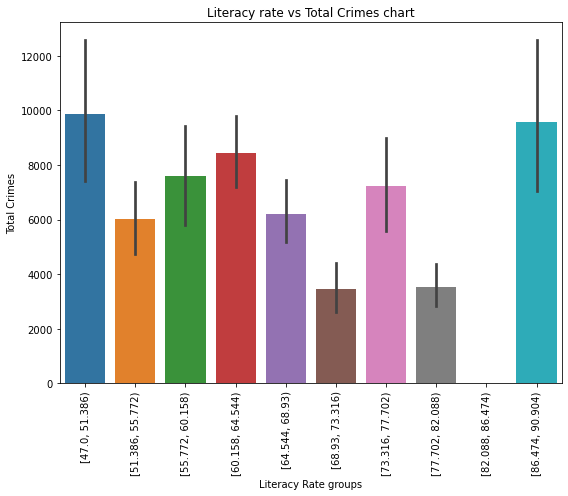

In [95]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(data = df, x= df['Literacy Rate groups'], y =df['Total Crimes']).set_title('Literacy rate vs Total Crimes chart')

plt.xticks(rotation=90)
plt.tight_layout()

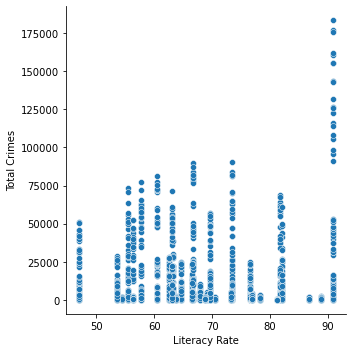

In [93]:
sns.relplot(data=df, x="Literacy Rate", y="Total Crimes")

#### 2.2	 Analysis of the type of crime vs each state vs Literacy rate.

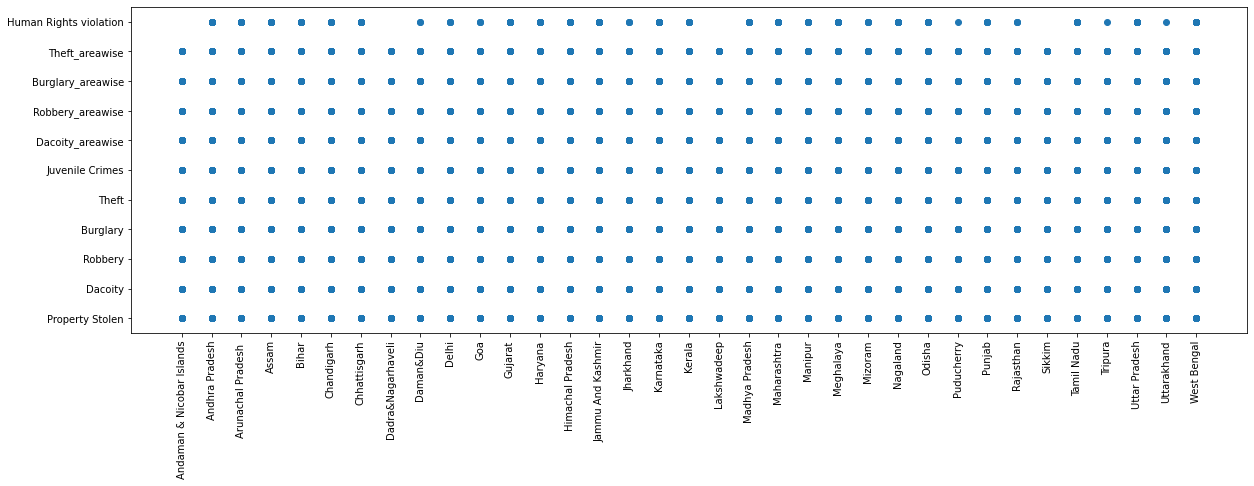

In [100]:
# Type of crime vs each state

plt.figure(figsize=(20,6))
plt.scatter(df['Area_Name'],df['Type of Crime'])
plt.xticks(rotation=90)
plt.show()

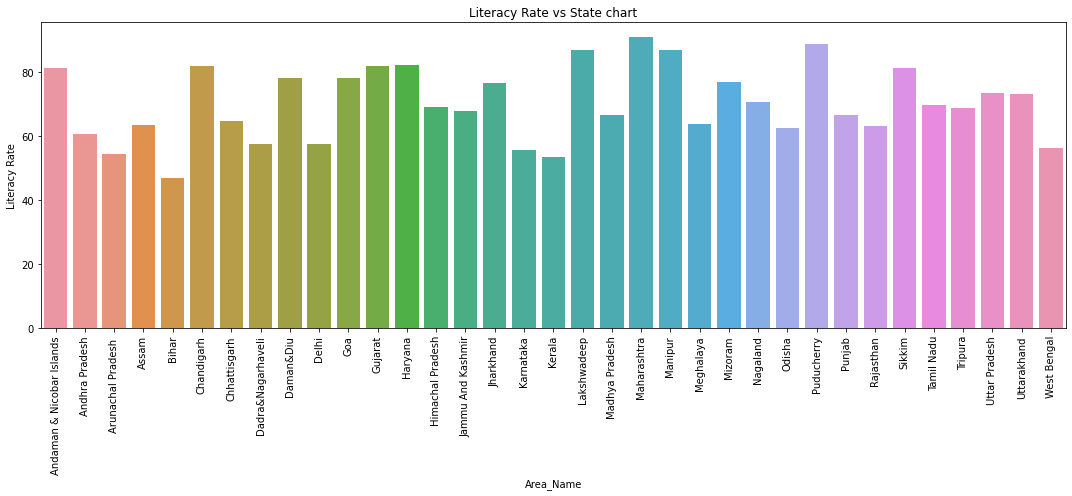

In [110]:
# Literacy Rate vs each state
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(data = df, x= df['Area_Name'], y =df['Literacy Rate'] ).set_title('Literacy Rate vs State chart')

plt.xticks(rotation=90)
plt.tight_layout()

#### 2.3	Analysis of year-on-year total crime rate.

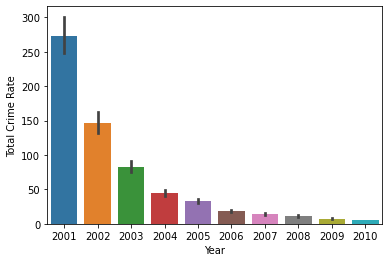

<Figure size 72x72 with 0 Axes>

In [22]:
sns.barplot(x=df['Year'],y=df['Total Crime Rate'],data=df)
plt.figure(figsize=(1,1))
plt.show()

#### 2.4	 Analysis of area vs overall crime

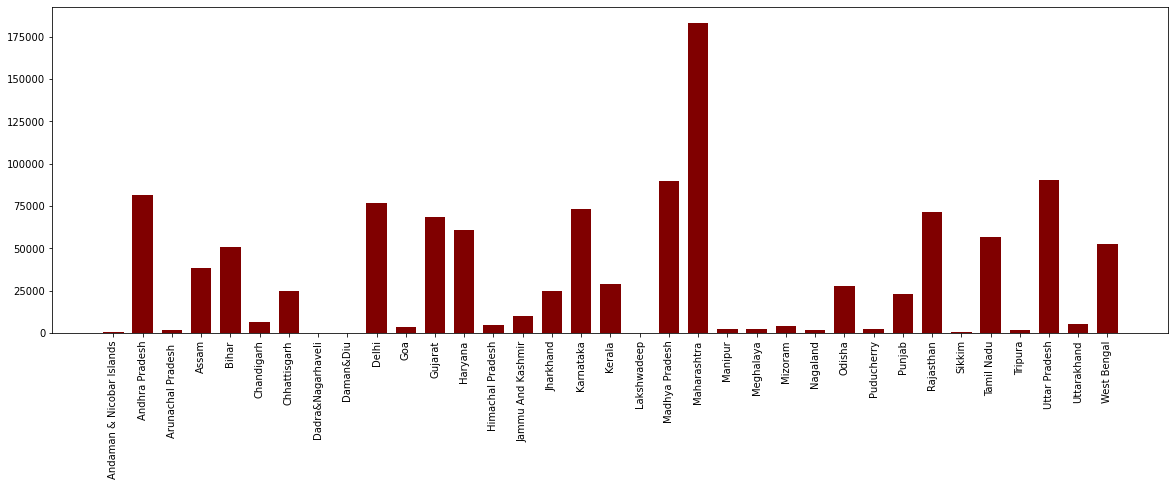

In [67]:
plt.figure(figsize=(20,6))
plt.bar(df['Area_Name'],df['Total Crimes'], color ='maroon', width = 0.7)
plt.xticks(rotation=90)
plt.show()

#### 2.5	 Analysis of Population vs overall Crime

In [81]:
df['Population groups'] = pd.cut(df.Population,bins= 15,right=False)

In [73]:
df['Population groups'].head()

0    [356.0, 1133161.6)
1    [356.0, 1133161.6)
2    [356.0, 1133161.6)
3    [356.0, 1133161.6)
4    [356.0, 1133161.6)
Name: Population groups, dtype: category
Categories (10, interval[float64, left]): [[356.0, 1133161.6) < [1133161.6, 2265967.2) < [2265967.2, 3398772.8) < [3398772.8, 4531578.4) ... [6797189.6, 7929995.2) < [7929995.2, 9062800.8) < [9062800.8, 10195606.4) < [10195606.4, 11339740.056)]

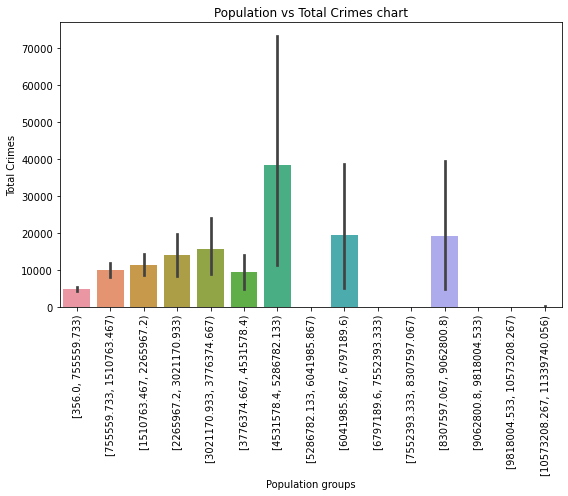

In [88]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(data = df, x= df['Population groups'], y =df['Total Crimes'] ).set_title('Population vs Total Crimes chart')

plt.xticks(rotation=90)
plt.tight_layout()

#### 2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

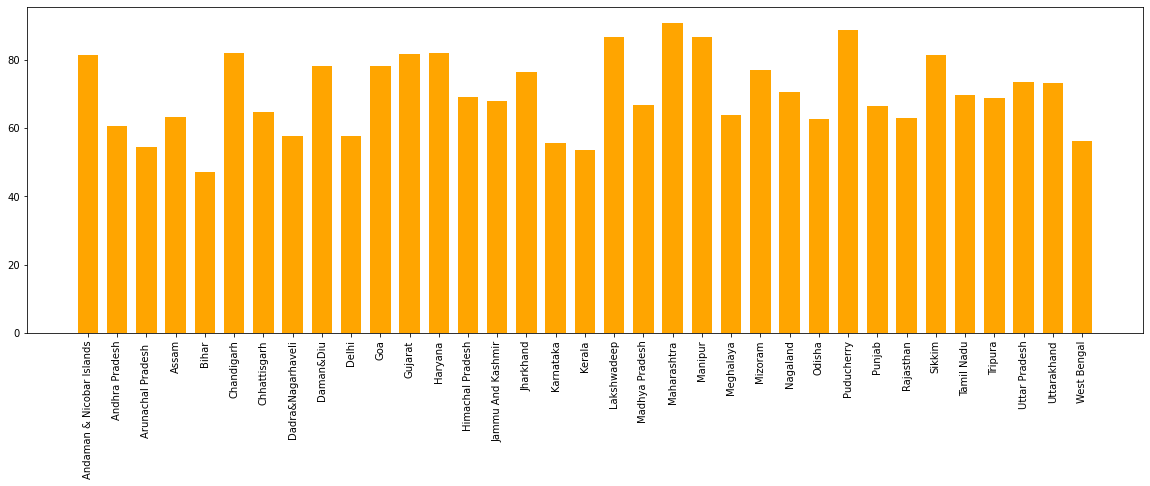

In [113]:
# Checking literacy rate of each state
plt.figure(figsize=(20,6))
plt.bar(df['Area_Name'],df['Literacy Rate'], color ='orange', width = 0.7)
plt.xticks(rotation=90)
plt.show()

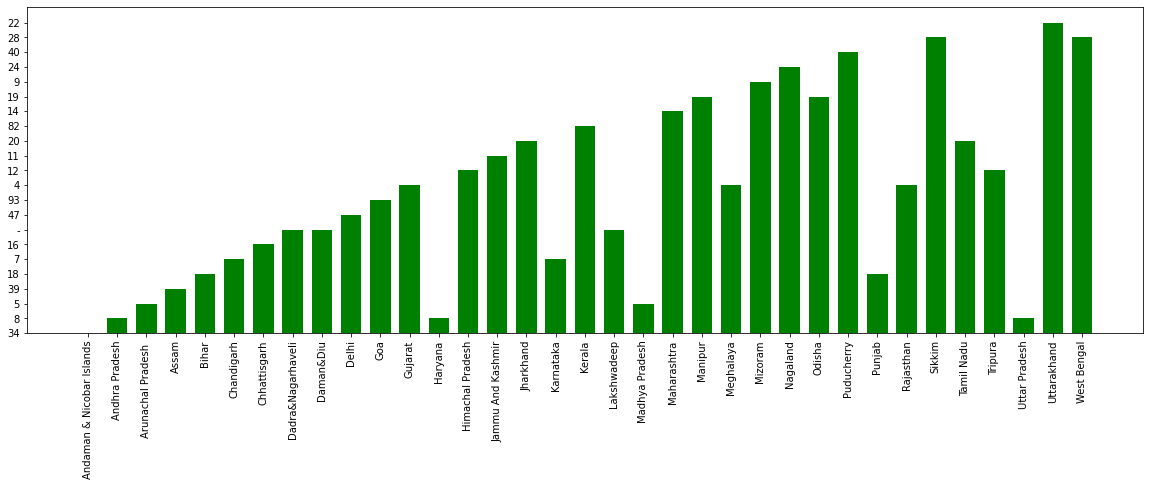

In [114]:
# Checking Unemployment of each state
plt.figure(figsize=(20,6))
plt.bar(df['Area_Name'],df['Unemployment'], color ='green', width = 0.7)
plt.xticks(rotation=90)
plt.show()

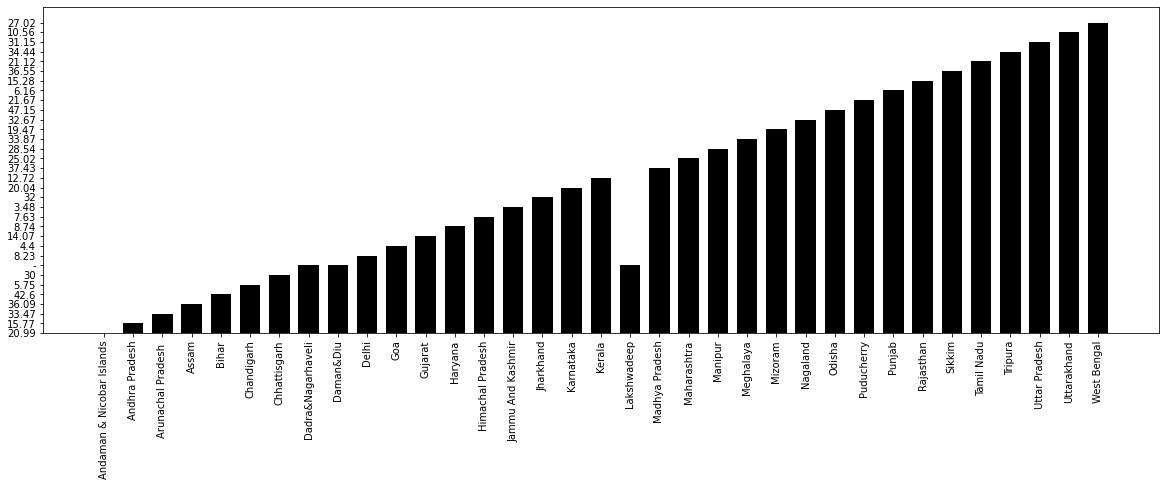

In [117]:
# Checking poverty of each state
plt.figure(figsize=(20,6))
plt.bar(df['Area_Name'],df['Poverty'], color ='black', width = 0.7)
plt.xticks(rotation=90)
plt.show()

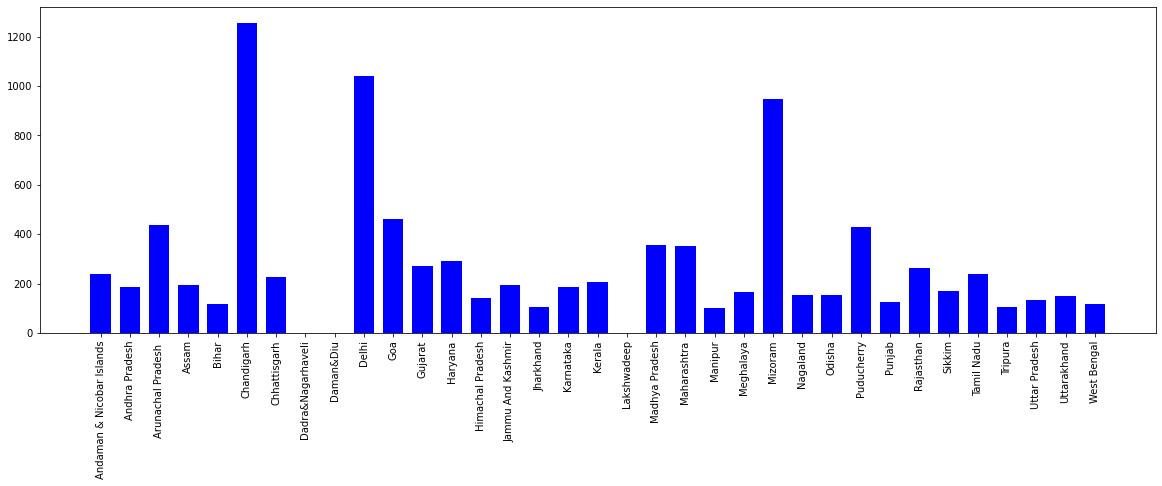

In [120]:
# Checking total crime rate of each state
plt.figure(figsize=(20,6))
plt.bar(df['Area_Name'],df['Total Crime Rate'], color ='blue', width = 0.7)
plt.xticks(rotation=90)
plt.show()